In [32]:
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [12]:
data = pd.read_csv('gbm-data.csv')
X, y = data.iloc[:, 1:], data.iloc[:, 0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

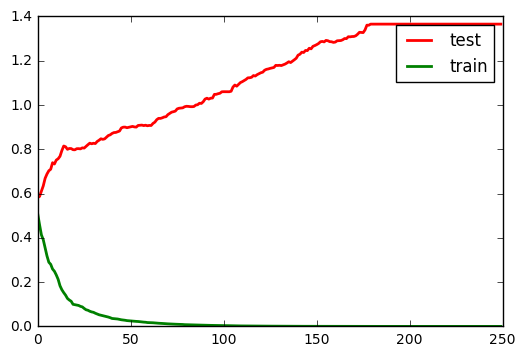

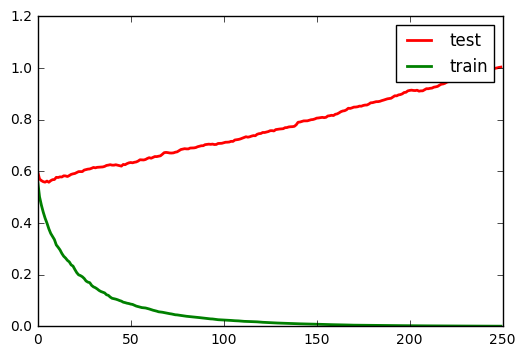

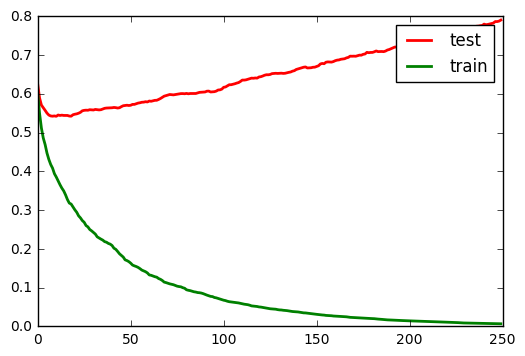

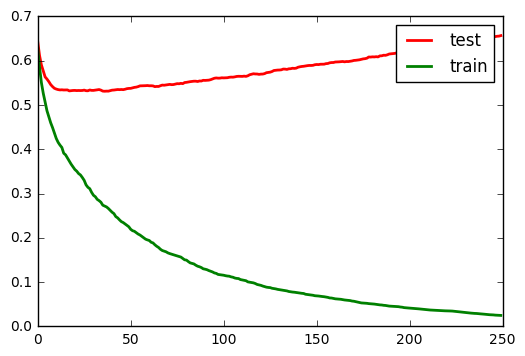

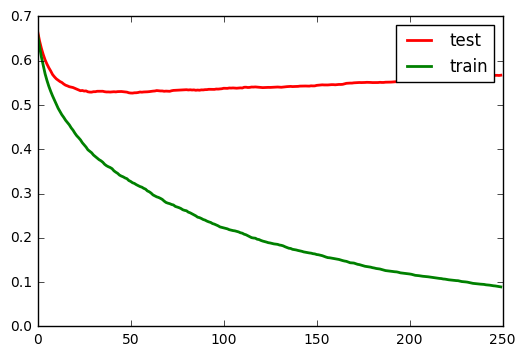

In [39]:
%matplotlib inline
mins = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    test_log_loss = []
    train_log_loss = []
    
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    
    min_i_test, min_loss_test = 0, 1000
    for i, y_pred_test in enumerate(clf.staged_decision_function(X_test)):
        y_pred_test = list(map(lambda y: 1 / (1 + math.exp(-y)), y_pred_test))
        loss_test = log_loss(y_test, y_pred_test)
        if loss_test < min_loss_test:
            min_loss_test = loss_test
            min_i_test = i
        test_log_loss.append(loss_test)

    min_i_train, min_loss_train = 0, 1000
    for i, y_pred_train in enumerate(clf.staged_decision_function(X_train)):
        y_pred_train = list(map(lambda y: 1 / (1 + math.exp(-y)), y_pred_train))
        loss_train = log_loss(y_train, y_pred_train)
        if loss_train < min_loss_train:
            min_loss_train = loss_train
            min_i_train = i
        train_log_loss.append(loss_train)

    mins[learning_rate] = {'loss_test': (min_i_test, min_loss_test), 'loss_train': (min_i_train, min_loss_train)}
    
    plt.figure()
    plt.plot(test_log_loss, 'r', linewidth=2)
    plt.plot(train_log_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [40]:
mins

{0.1: {'loss_test': (51, 0.52692018722758438),
  'loss_train': (249, 0.089369624162740857)},
 0.2: {'loss_test': (36, 0.53109463759688502),
  'loss_train': (249, 0.024906124380084917)},
 0.3: {'loss_test': (10, 0.54231411100245541),
  'loss_train': (249, 0.0068872910014473624)},
 0.5: {'loss_test': (6, 0.55820255231642613),
  'loss_train': (249, 0.001022368076368318)},
 1: {'loss_test': (0, 0.58229425942784763),
  'loss_train': (180, 0.00020857611394801452)}}

In [42]:
with open('answer1.txt', 'w') as f:
    f.write('overfitting')

with open('answer2.txt', 'w') as f:
    f.write('{:.2f} {}'.format(0.53109463759688502, 37))

In [48]:
clf = GradientBoostingClassifier(n_estimators=37, random_state=241)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
print(log_loss(y_test, probs))

0.530026300619


In [49]:
with open('answer3.txt', 'w') as f:
    f.write('{:.2f}'.format(0.530026300619))